In [7]:
!touch requirements.txt

In [8]:
%%capture
!pip install -r requirements.txt

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.datasets import get_data

##Load Data

In [10]:
from sklearn.datasets import fetch_california_housing

In [11]:
california_housing = fetch_california_housing(as_frame=True)

In [12]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
type(california_housing)

sklearn.utils._bunch.Bunch

In [14]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## Try Pycaret

In [15]:
from pycaret.regression import *
reg = setup(data = california_housing.data, target = california_housing.target)

compare_models()

,Description,Value
0,Session id,8771
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3150,0.2224,0.4712,0.8315,0.1431,0.1790,0.4030
xgboost,Extreme Gradient Boosting,0.3171,0.2295,0.4788,0.8262,0.1455,0.1795,0.3330
et,Extra Trees Regressor,0.3348,0.2583,0.5077,0.8045,0.1499,0.1868,4.3700
rf,Random Forest Regressor,0.3372,0.2655,0.5149,0.7989,0.1535,0.1906,12.4890
gbr,Gradient Boosting Regressor,0.3675,0.2828,0.5315,0.7858,0.1625,0.2112,5.3450
ridge,Ridge Regression,0.5341,0.5319,0.7288,0.5979,0.2249,0.3195,0.0630
br,Bayesian Ridge,0.5342,0.5318,0.7288,0.5979,0.2249,0.3196,0.0470
lr,Linear Regression,0.5341,0.5319,0.7288,0.5978,0.2249,0.3195,1.2220
dt,Decision Tree Regressor,0.4761,0.5478,0.7398,0.5847,0.2195,0.2609,0.2720
lar,Least Angle Regression,0.5552,0.6549,0.8060,0.5065,0.2369,0.3203,0.0460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=8771)

In [16]:
compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3150,0.2224,0.4712,0.8315,0.1431,0.1790,0.4840
xgboost,Extreme Gradient Boosting,0.3171,0.2295,0.4788,0.8262,0.1455,0.1795,0.3760
et,Extra Trees Regressor,0.3348,0.2583,0.5077,0.8045,0.1499,0.1868,3.3490
rf,Random Forest Regressor,0.3372,0.2655,0.5149,0.7989,0.1535,0.1906,9.2060
gbr,Gradient Boosting Regressor,0.3675,0.2828,0.5315,0.7858,0.1625,0.2112,2.9990
ridge,Ridge Regression,0.5341,0.5319,0.7288,0.5979,0.2249,0.3195,0.0440
br,Bayesian Ridge,0.5342,0.5318,0.7288,0.5979,0.2249,0.3196,0.0260
lr,Linear Regression,0.5341,0.5319,0.7288,0.5978,0.2249,0.3195,0.0540
dt,Decision Tree Regressor,0.4761,0.5478,0.7398,0.5847,0.2195,0.2609,0.1350
lar,Least Angle Regression,0.5552,0.6549,0.8060,0.5065,0.2369,0.3203,0.0410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=8771)

## Normal

In [17]:
california_housing.data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Preparing Dataset

In [18]:
dataset = pd.DataFrame(california_housing.data, columns= california_housing.feature_names)

In [19]:
dataset.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
dataset['median_house_value'] = california_housing.target

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Summarize data

In [22]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Check missing value

In [23]:
dataset.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64

#### EDA

In [24]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


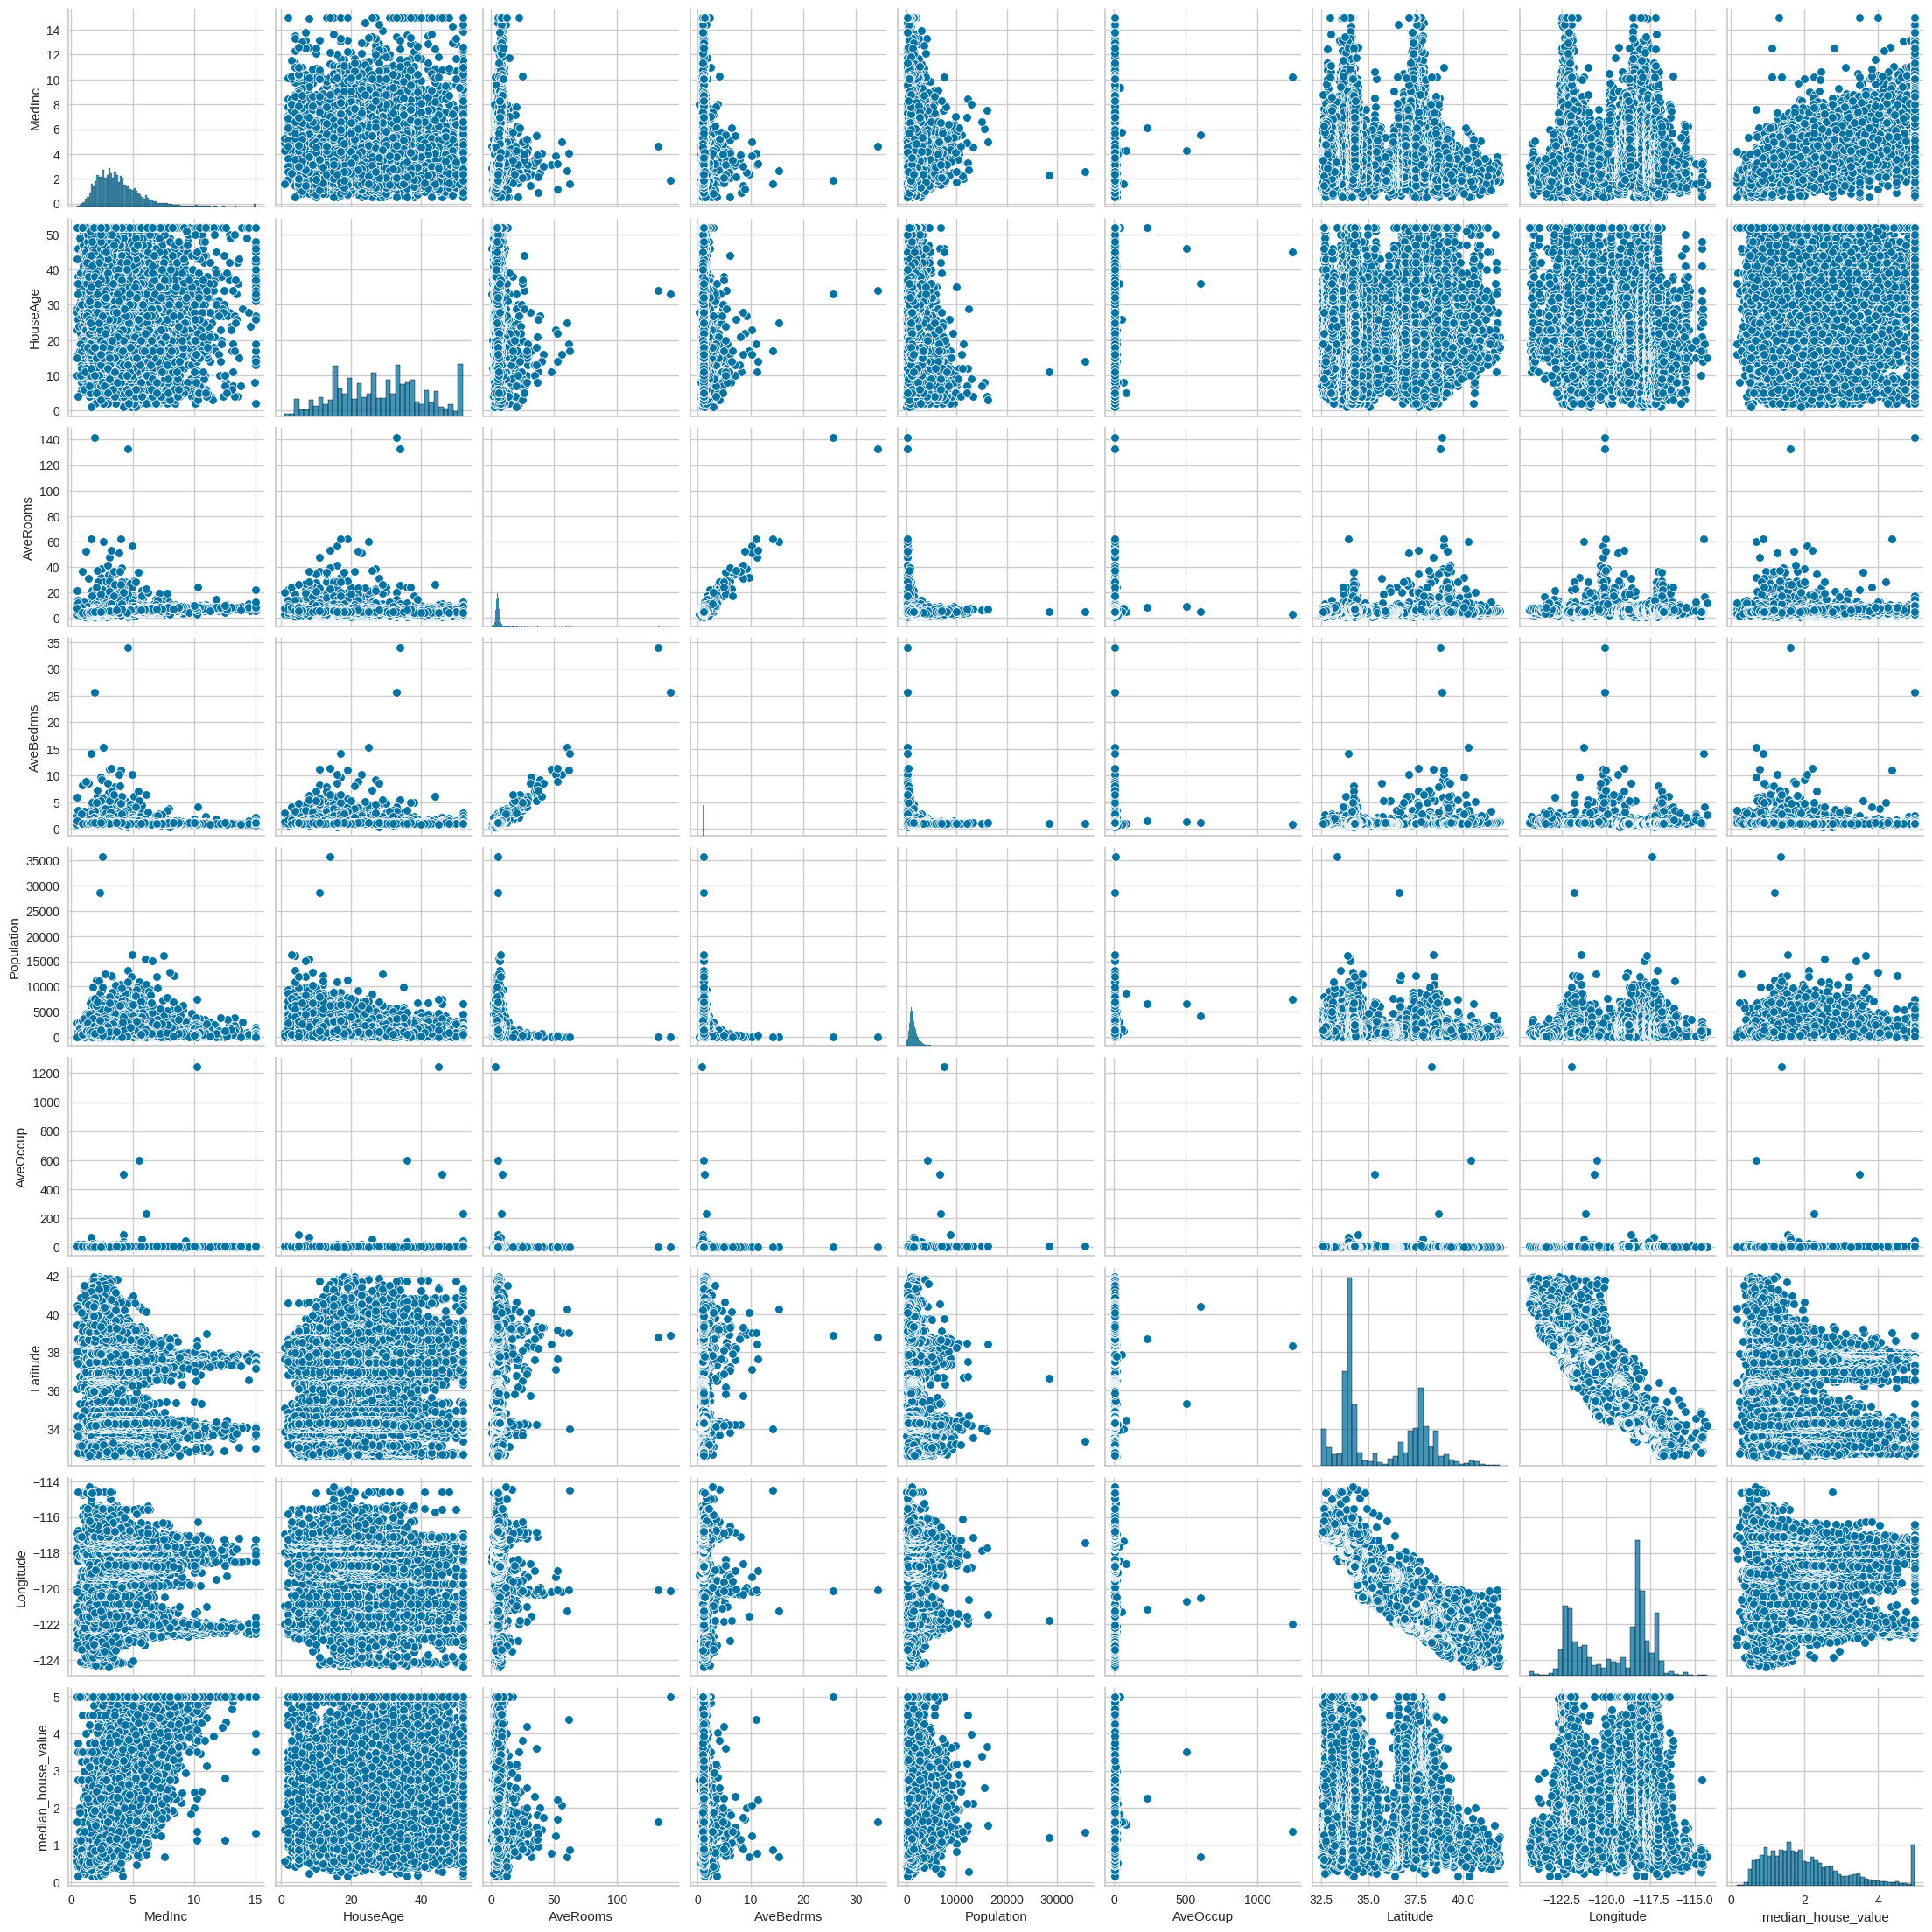

In [25]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'median_house')

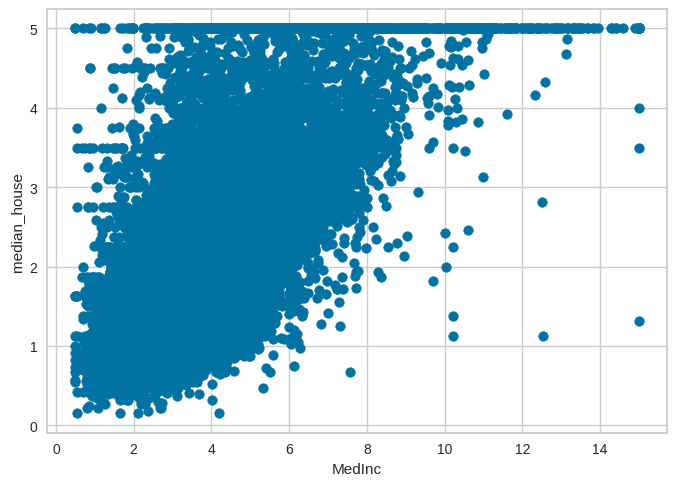

In [26]:
plt.scatter(dataset['MedInc'], dataset['median_house_value'])
plt.xlabel('MedInc')
plt.ylabel('median_house')

<Axes: xlabel='AveRooms', ylabel='AveOccup'>

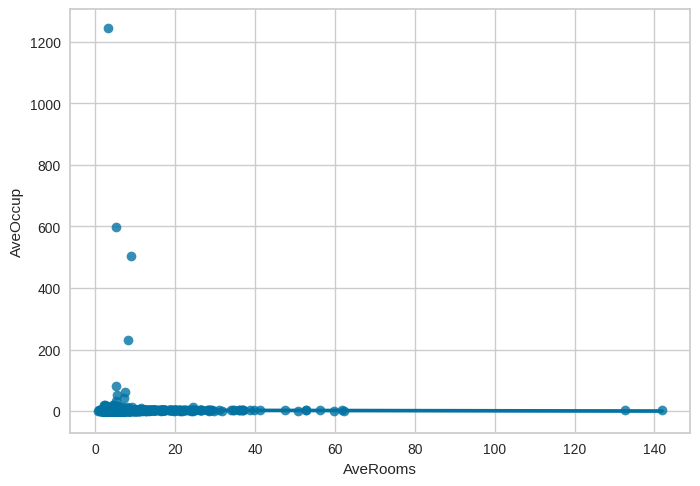

In [27]:
sns.regplot(x='AveRooms', y='AveOccup', data=dataset)

No Correlation between AverageRooms and Average Occupancy

#### Split Independent and Dependend

In [28]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

#### Split Train and Test

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

### Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
reg_pred = regression.predict(X_test)

### Performance

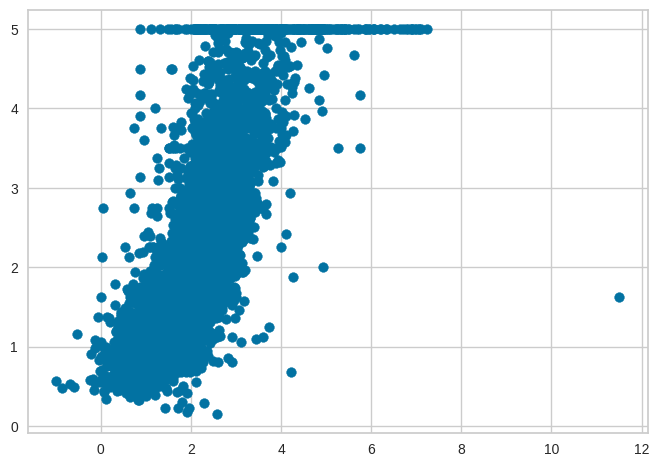

In [37]:
plt.scatter(reg_pred, y_test)

In [38]:
residuals = y_test - reg_pred

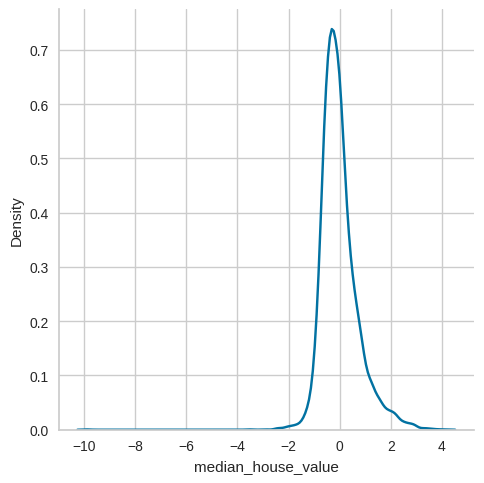

In [39]:
sns.displot(residuals, kind='kde')
# Uniform Distribution

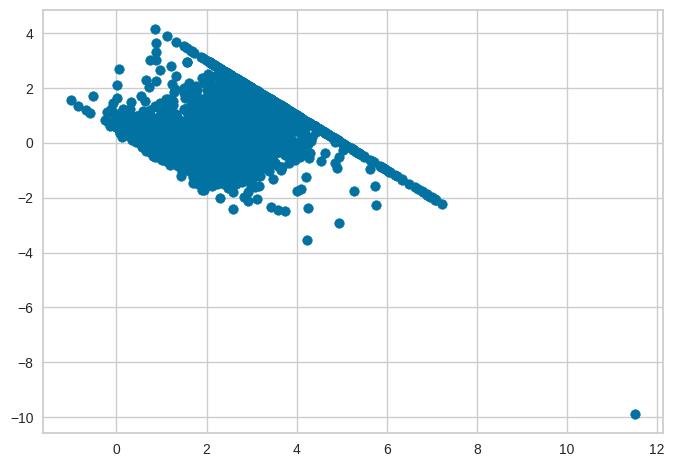

In [40]:
plt.scatter(reg_pred, residuals)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))

0.5305677824766752
0.5272474538305955


In [42]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.5957702326061664


We see that the PyCaret gave similar R2 results

In [43]:
import pickle

In [44]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [45]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [46]:
!ls

logs.log  regmodel.pkl	requirements.txt  sample_data
